In [1]:
import os 

import pandas as pd
from matplotlib import pyplot as plt 


In [2]:
# ------------------------------------------------------------
# ------------------------------------------------------------
#                 > Settings section <
# ------------------------------------------------------------
# ------------------------------------------------------------
data_file_dir = images_path = os.path.join("..","data", "2018", "MICRODATI")
data_file_name = "INCSTRAD_Microdati_2018.txt"

images_path = os.path.join("..","images","2018")
image_file_prefix = "2018-"


# Here a dictinary for the charts labels and titles.
it = {
     "natura_incidente tit":    ("Raggruppamento per tipo incidente", 16)
    ,"natura_incidente x":      ("Tipo incidente", 12)
    ,"natura_incidente y":      ("Percentuale", 12)
    ,"natura_incidente label":  ("Tipo incidente", 12)
}
labels = it

In [3]:
# ------------------------------------------------------------
# ------------------------------------------------------------
# Some common functions.
# ------------------------------------------------------------
# ------------------------------------------------------------
def remove_tick_lines(which, ax):
    if which == 'y':
        for line in ax.yaxis.get_majorticklines():
            line.set_visible(False)
    elif which == 'x':
        for line in ax.xaxis.get_majorticklines():
            line.set_visible(False)
    else:
        assert False, "Wrong axis parameter."

def every_nth_tick(ax, every_nth = 2):
    for n, label in enumerate(ax.xaxis.get_ticklabels()):
        if n % every_nth != 0:
            label.set_visible(False)

def autolabel(rects, ax, dec_no=0):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2., height + (height * 0.01),
                '%s' % round(height, dec_no),
                ha='center', va='bottom')

def set_axes_common_properties(axe, no_grid=False, border=False):
    rv = 1
    try:
        axe.spines['top'].set_visible(border)
        axe.spines['left'].set_visible(border)
        axe.spines['right'].set_visible(border)
        axe.spines['bottom'].set_visible(border)
        if no_grid == False:
            axe.grid(color='#636262', linestyle='-.', linewidth=0.2)
        rv = 0
    except Exception as ex:
        print("Errore - {e}".format(e=str(ex)))
        
    return rv


In [4]:
# ------------------------------------------------------------
# ------------------------------------------------------------
# Decoding dataframes
# ------------------------------------------------------------
# ------------------------------------------------------------

natura_incidente = pd.DataFrame(["Scontro frontale", "Scontro frontale-laterale", "Scontro laterale", "Tamponamento", "Investimento di pedoni", "Urto con veicolo in fermata o in arresto", "Urto con veicolo in sosta", "Urto con ostacolo", "Urto con treno", "Fuoriuscita, sbandamento", "Infortunio per frenata improvvisa", "Infortunio per caduta da veicolo"]
                              ,index = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"])
esito_incidente = pd.DataFrame(["Incolume", "Ferito", "Morto nelle 24 ore", "Morto entro il trentesimo giorno"]
                               ,index=["1", "2", "3", "4"]
                               ,columns=["description"])
esito_passeggero  = pd.DataFrame(["Morto", "Ferito"]
                                 ,index=["1", "2"]
                                 ,columns=["description"])
pedone_incident_result = pd.DataFrame(["Maschio morto" ,"Femmina morta" ,"Maschio ferito" ,"Femmina ferita"]
                                     ,index=["1" ,"2" ,"3" ,"4"]
                                     ,columns=["description"])


In [5]:
# ------------------------------------------------------------
# ------------------------------------------------------------
# Data load.
# ------------------------------------------------------------
# ------------------------------------------------------------
dtype_dict = {
    'natura_incidente':str
}

df = pd.read_csv(os.path.join(data_file_dir, data_file_name), sep='\t', lineterminator='\n'
                ,low_memory=False
                ,dtype=dtype_dict)

df.shape    

(172553, 117)

In [6]:
df.head(3)

,anno,provincia,comune,giorno,organo_di_rilevazione,localizzazione_incidente,denominazione_della_strada,tronco_di_strada_o_autostrada,tipo_di_strada,pavimentazione,...,feriti_maschi_coinvolti_su97,feriti_femmine_coinvolti_s98,morti_entro_24_ore,morti_entro_30_giorni,feriti,descrizione_strada,Ora,chilometri,ettometrica,trimestre
0,18,83,9,1,2,5,147,12,2,1,...,0,0,0,0,1,...,1,0000,000,1
1,18,60,6,1,2,2,056,12,2,1,...,0,0,0,0,7,...,3,0000,500,1
2,18,9,6,1,2,3,001,12,2,1,...,0,0,0,0,5,...,3,0000,000,1


In [7]:
def group_by_natura_incidente(df):
    rv = False
    res = None
    try:
        col_name = "natura_incidente"
        ni_count = df[col_name].value_counts()
        ni_count = ni_count.to_frame()        
        df_merged = pd.merge(ni_count,natura_incidente
                            ,left_index=True
                            ,right_index=True)
        df_merged.rename(columns={"natura_incidente": "Number", 0: "Label"}, inplace=True)
        total = df_merged["Number"].sum()
        assert total == df.shape[0]
        df_merged["Percentage"] = df_merged["Number"].apply(lambda row: round((row / total) * 100, 1))
        res = df_merged
    except Exception as ex:
        print("group_by_natura_incidente failed - {ex}".format(ex=ex))
    else:
        rv = True    
    return (rv, res)

def chart_natura_incidente(x, y, ax, colors=["#BEE2F0", "#d5d5d5", "#c87607"]):
    rv = False
    res = None
    try:
        set_axes_common_properties(ax, no_grid=False)
        ax.set_title(labels["natura_incidente tit"][0], fontsize=labels["natura_incidente tit"][1])
        ax.set_ylabel(labels["natura_incidente y"][0], fontsize=labels["natura_incidente y"][1])
        ax.set_xlabel(labels["natura_incidente x"][0], fontsize=labels["natura_incidente x"][1])

        width = 0.5
        rects = ax.bar(x, y, width=width, color=colors[0], label=labels["natura_incidente label"][0])

        autolabel(rects, ax, 1)

        ax.tick_params(axis='both', labelsize=14)
        ax.set_xticklabels(x, rotation=80)

        remove_tick_lines('y', ax)
        remove_tick_lines('x', ax)
        
    except Exception as ex:
        print("chart_natura_incidente failed - {ex}".format(ex=ex))
    else:
        rv = True    
    return rv    
    

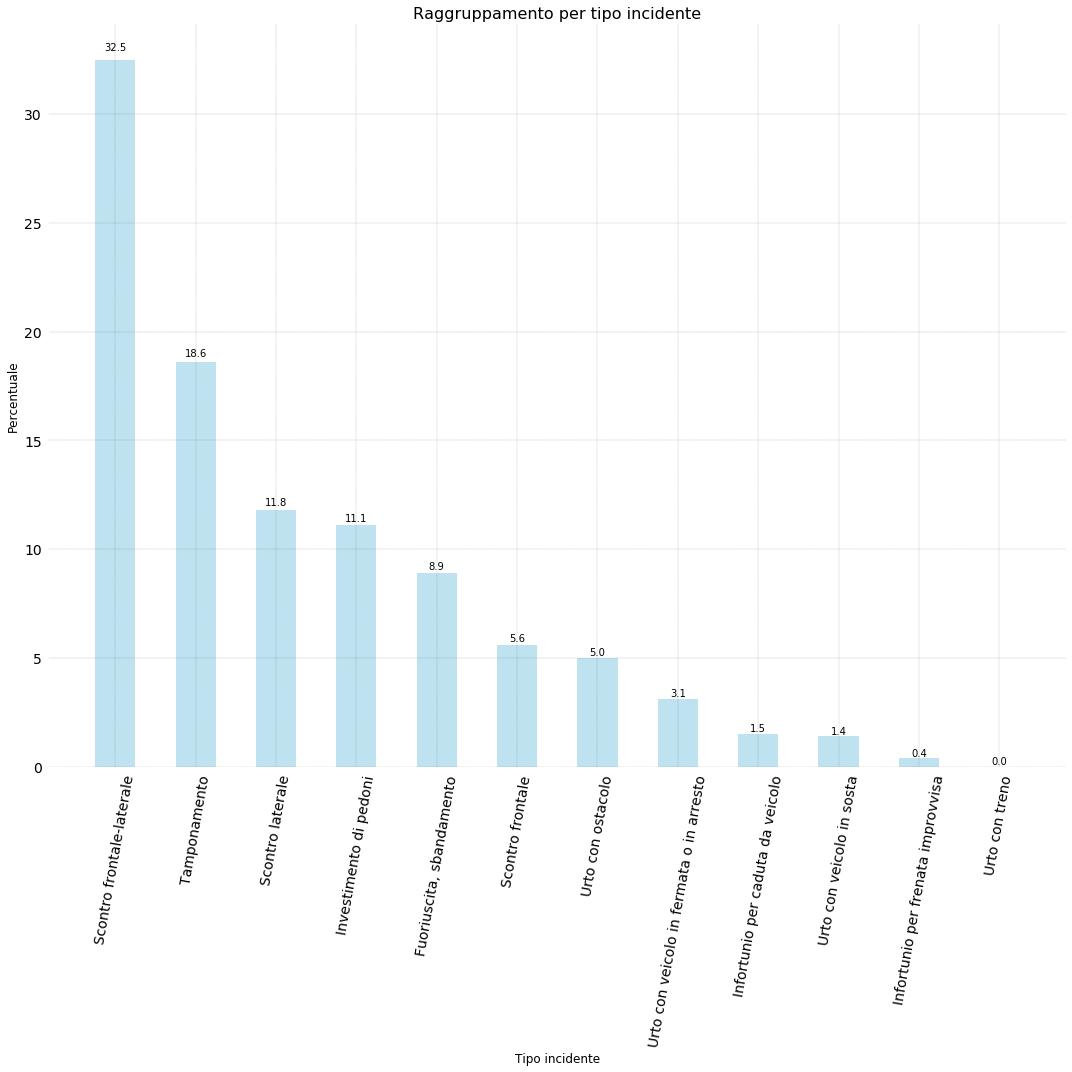

In [8]:
rv, ni_count = group_by_natura_incidente(df)
if rv == False:
    assert False, "group_by_natura_incidente failed."

fig = plt.figure(figsize=(15, 15))
gs = fig.add_gridspec(1, 1)
fig.set_tight_layout(True)

ax = []
ax.append(fig.add_subplot(gs[0, 0]))

rv = chart_natura_incidente(ni_count['Label'],ni_count["Percentage"], ax[0])

plt.savefig(os.path.join(images_path,"{prefix}natura_incidente.png".format(prefix=image_file_prefix)))



In [9]:
def flatten_incident_result(column_name, column_postfix, positive_list):
    """
    """
    rv = False
    try:
        print("Column name to flatten: {col}".format(col=column_name))
        new_col_name = column_name + column_postfix
        df[new_col_name] = df[column_name].apply(lambda row: 1 if row in positive_list else 0 )
    
    except Exception as ex:
        print("flatten_incident_result failed - {ex}".format(ex=ex))
    else:
        rv = True    
    return rv    

def decompose_incident_results():
    """
    """
    try:
        mask = esito_incidente['description'].isin(["Morto nelle 24 ore", "Morto entro il trentesimo giorno"])
        dead_codes = esito_incidente[mask].index.to_list()

        mask = esito_incidente['description'].isin(["Ferito"])
        injured_codes = esito_incidente[mask].index.to_list()

        mask = esito_incidente['description'].isin(["Incolume"])
        uninjured_codes = esito_incidente[mask].index.to_list()
        
        mask = esito_passeggero['description'].isin(["Ferito"]) 
        passenger_injured_codes = esito_passeggero[mask].index.to_list()

        mask = esito_passeggero['description'].isin(["Morto"]) 
        passenger_dead_codes = esito_passeggero[mask].index.to_list()
        
        mask = pedone_incident_result['description'].isin(["Maschio morto", "Femmina morta"])
        pedone_dead_codes = pedone_incident_result[mask].index.to_list()

        mask = pedone_incident_result['description'].isin(["Maschio ferito", "Femmina ferita"])
        pedone_injured_codes = pedone_incident_result[mask].index.to_list()
        
        flatten_incident_result('veicolo__a___esito_conducente', " morto",    dead_codes)
        flatten_incident_result('veicolo__a___esito_conducente', " ferito",   injured_codes)
        flatten_incident_result('veicolo__a___esito_conducente', " incolume", uninjured_codes)

        flatten_incident_result('veicolo__a___esito_passegg38', " morto",    passenger_dead_codes     )
        flatten_incident_result('veicolo__a___esito_passegg38', " ferito",   passenger_injured_codes  )

        flatten_incident_result('veicolo__a___esito_passegg41', " morto",    passenger_dead_codes     )
        flatten_incident_result('veicolo__a___esito_passegg41', " ferito",   passenger_injured_codes  )

        flatten_incident_result('veicolo__a___esito_passegg44', " morto",    passenger_dead_codes   )
        flatten_incident_result('veicolo__a___esito_passegg44', " ferito",   passenger_injured_codes)

        flatten_incident_result('veicolo__b___esito_conducente', " morto",    dead_codes)
        flatten_incident_result('veicolo__b___esito_conducente', " ferito",   injured_codes)
        flatten_incident_result('veicolo__b___esito_conducente', " incolume", uninjured_codes)

        flatten_incident_result('veicolo__b___esito_passegg60', " morto",    passenger_dead_codes     )
        flatten_incident_result('veicolo__b___esito_passegg60', " ferito",   passenger_injured_codes  )

        flatten_incident_result('veicolo__b___esito_passegg63', " morto",    passenger_dead_codes   )
        flatten_incident_result('veicolo__b___esito_passegg63', " ferito",   passenger_injured_codes)

        flatten_incident_result('veicolo__b___esito_passegg66', " morto",    passenger_dead_codes   )
        flatten_incident_result('veicolo__b___esito_passegg66', " ferito",   passenger_injured_codes)

        flatten_incident_result('veicolo__c___esito_conducente', " morto",    dead_codes     )
        flatten_incident_result('veicolo__c___esito_conducente', " ferito",   injured_codes  )
        flatten_incident_result('veicolo__c___esito_conducente', " incolume", uninjured_codes)

        flatten_incident_result('veicolo__c___esito_passegg82', " morto",    passenger_dead_codes   )
        flatten_incident_result('veicolo__c___esito_passegg82', " ferito",   passenger_injured_codes)

        flatten_incident_result('veicolo__c___esito_passegg85', " morto",    passenger_dead_codes   )
        flatten_incident_result('veicolo__c___esito_passegg85', " ferito",   passenger_injured_codes)

        flatten_incident_result('veicolo__c___esito_passegg88', " morto",    passenger_dead_codes   )
        flatten_incident_result('veicolo__c___esito_passegg88', " ferito",   passenger_injured_codes)
        
        flatten_incident_result('pedone_morto_1__sesso', " morto", pedone_dead_codes)
        flatten_incident_result('pedone_ferito_1__sesso', " ferito", pedone_injured_codes)

        flatten_incident_result('pedone_morto_2__sesso', " morto", pedone_dead_codes)
        flatten_incident_result('pedone_ferito_2__sesso', " ferito", pedone_injured_codes)

        flatten_incident_result('pedone_morto_3__sesso', " morto", pedone_dead_codes)
        flatten_incident_result('pedone_ferito_3__sesso', " ferito", pedone_injured_codes)

        flatten_incident_result('pedone_morto_4__sesso', " morto", pedone_dead_codes)
        flatten_incident_result('pedone_ferito_4__sesso', " ferito", pedone_injured_codes)

    except Exception as ex:
        print("flatten_incident_result failed - {ex}".format(ex=ex))
    else:
        rv = True    
    return rv    

def bulk_columns_rename(col_list, postfix):
    """
    """
    for col in col_list:
        df.rename(columns={col: col + postfix}, inplace=True)

def rationalize_col_names():
    """
    """
    dead_other_columns = ["veicolo__a___altri_passegg47", "veicolo__a___altri_passegg48"
                     ,"veicolo__b___altri_passegg69", "veicolo__b___altri_passegg70"
                     ,"veicolo__c___altri_passegg91", "veicolo__c___altri_passegg92"
                     ,"morti_maschi_coinvolti_su_95", "morti_femmine_coinvolti_su96"]
    postfix = " morto"
    bulk_columns_rename(dead_other_columns, postfix)
    
    injured_other_columns = ["veicolo__a___altri_passegg49", "veicolo__a___altri_passegg50"
                        ,"veicolo__b___altri_passegg71", "veicolo__b___altri_passegg72"
                        ,"veicolo__c___altri_passegg93", "veicolo__c___altri_passegg94"
                        ,"feriti_maschi_coinvolti_su97", "feriti_femmine_coinvolti_s98"]
    postfix = " ferito"
    bulk_columns_rename(injured_other_columns, postfix)
    
def select_column(key):
    result = []
    rv = False
    try:
        for col in df.columns:
            if key in col:
                result.append(col)
    except Exception as ex:
        print("select_column failed - {ex}".format(ex=ex))
    else:
        rv = True    
    return (rv, result)    
 

In [10]:

decompose_incident_results()
rationalize_col_names()

# Quality check ...
mask = df["pedone_morto_1__sesso"].isin(["1","2"])
orig_count = df.loc[mask]["pedone_morto_1__sesso"].count()
flatten_count = df["pedone_morto_1__sesso morto"].sum()
assert orig_count == flatten_count, "The number must be the same."


Column name to flatten: veicolo__a___esito_conducente
Column name to flatten: veicolo__a___esito_conducente
Column name to flatten: veicolo__a___esito_conducente
Column name to flatten: veicolo__a___esito_passegg38
Column name to flatten: veicolo__a___esito_passegg38
Column name to flatten: veicolo__a___esito_passegg41
Column name to flatten: veicolo__a___esito_passegg41
Column name to flatten: veicolo__a___esito_passegg44
Column name to flatten: veicolo__a___esito_passegg44
Column name to flatten: veicolo__b___esito_conducente
Column name to flatten: veicolo__b___esito_conducente
Column name to flatten: veicolo__b___esito_conducente
Column name to flatten: veicolo__b___esito_passegg60
Column name to flatten: veicolo__b___esito_passegg60
Column name to flatten: veicolo__b___esito_passegg63
Column name to flatten: veicolo__b___esito_passegg63
Column name to flatten: veicolo__b___esito_passegg66
Column name to flatten: veicolo__b___esito_passegg66
Column name to flatten: veicolo__c___esi

In [59]:
from enum import Enum

class TypeOfField(Enum):
    DRIVER = "esito_conducente"
    PASSENGER = "esito_passegg"
    PEDESTRIAN ="pedone"    

class TypeOfIncidentResult(Enum):
    UNINJURED = " incolume"
    INJURED = " ferito"
    DEAD = " morto"
    
def sum_all_components(field_type, result_type):
    """
    """
    rv = False
    result = 0
    try:
        all_cols = select_column(result_type.value)
        if all_cols[0] == False:
            return (False, [])
        col_to_sum = []
        if field_type == TypeOfField.DRIVER or field_type == TypeOfField.PASSENGER:
            for col in all_cols[1]:
                if field_type.value in col:
                    col_to_sum.append(col)
        else:
            for col in all_cols[1]:
                if col.startswith(field_type.value):
                    col_to_sum.append(col)
        col_sum = 0
        for col in col_to_sum:
            col_sum += df[col].sum()
            print("{c}.sum -> {s}".format(c=col,s=col_sum))
            result += col_sum
    except Exception as ex:
        print("sum_all_components failed - {ex}".format(ex=ex))
    else:
        rv = True    
    return (rv, result) 
    

In [60]:
driver_sum = {}
result = sum_all_components(TypeOfField.DRIVER, TypeOfIncidentResult.DEAD)
if result[0] == True:
   driver_sum[TypeOfField.DRIVER] = result[1]

result = sum_all_components(TypeOfField.PASSENGER, TypeOfIncidentResult.DEAD)
if result[0] == True:
   driver_sum[TypeOfField.PASSENGER] = result[1]

result = sum_all_components(TypeOfField.PEDESTRIAN, TypeOfIncidentResult.DEAD)
if result[0] == True:
   driver_sum[TypeOfField.PEDESTRIAN] = result[1]

driver_sum

veicolo__a___esito_conducente morto.sum -> 1444
veicolo__b___esito_conducente morto.sum -> 2167
veicolo__c___esito_conducente morto.sum -> 2212
veicolo__a___esito_passegg38 morto.sum -> 62
veicolo__a___esito_passegg41 morto.sum -> 88
veicolo__a___esito_passegg44 morto.sum -> 98
veicolo__b___esito_passegg60 morto.sum -> 140
veicolo__b___esito_passegg63 morto.sum -> 153
veicolo__b___esito_passegg66 morto.sum -> 154
veicolo__c___esito_passegg82 morto.sum -> 159
veicolo__c___esito_passegg85 morto.sum -> 159
veicolo__c___esito_passegg88 morto.sum -> 159
pedone_morto_1__sesso morto.sum -> 604
pedone_morto_2__sesso morto.sum -> 612
pedone_morto_3__sesso morto.sum -> 612
pedone_morto_4__sesso morto.sum -> 612


{<TypeOfField.DRIVER: 'esito_conducente'>: 5823,
 <TypeOfField.PASSENGER: 'esito_passegg'>: 1172,
 <TypeOfField.PEDESTRIAN: 'pedone'>: 2440}

In [46]:
all_cols = select_column(TypeOfIncidentResult.DEAD.value)
all_cols[1]
result = []
for col in all_cols[1]:
    if TypeOfField.DRIVER.value in col:
        result.append(col)
result

['veicolo__a___esito_conducente morto',
 'veicolo__b___esito_conducente morto',
 'veicolo__c___esito_conducente morto']